In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
# считаем данные из файла
data = pd.read_csv('wine.csv')

In [188]:
# Форма датасета
data.shape

(129971, 13)

In [189]:
# Просмотрим, что имеется в датасете
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [190]:
# Список уникальных семелье
print(data['taster_name'].unique())
print(f"Количество уникальных значений - {data['taster_name'].unique().shape[0]}")

['Kerin O’Keefe' 'Roger Voss' 'Paul Gregutt' 'Alexander Peartree'
 'Michael Schachner' 'Anna Lee C. Iijima' 'Virginie Boone' 'Matt Kettmann'
 nan 'Sean P. Sullivan' 'Jim Gordon' 'Joe Czerwinski'
 'Anne Krebiehl\xa0MW' 'Lauren Buzzeo' 'Mike DeSimone' 'Jeff Jenssen'
 'Susan Kostrzewa' 'Carrie Dykes' 'Fiona Adams' 'Christina Pickard']
Количество уникальных значений - 20


Следует учитывать, что одно значение - nun, поэтому количество уникальных, ненулевых значений = 19

In [191]:
# Информация о типах данных в датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [192]:
# Определим количество дубликатов
dbl = data[data.duplicated()]
print(f"Количество дубликатов - {dbl.shape[0]}")

Количество дубликатов - 9983


In [193]:
# Удалим дубликаты
data = data.drop_duplicates()
print(f"Форма датасета после удаления дубликатов - {data.shape}")

Форма датасета после удаления дубликатов - (119988, 13)


In [194]:
# Список столбцов, в которых есть пустые значения
data.isnull().any()

country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

Text(0.5, 41.09375, 'Колонка')

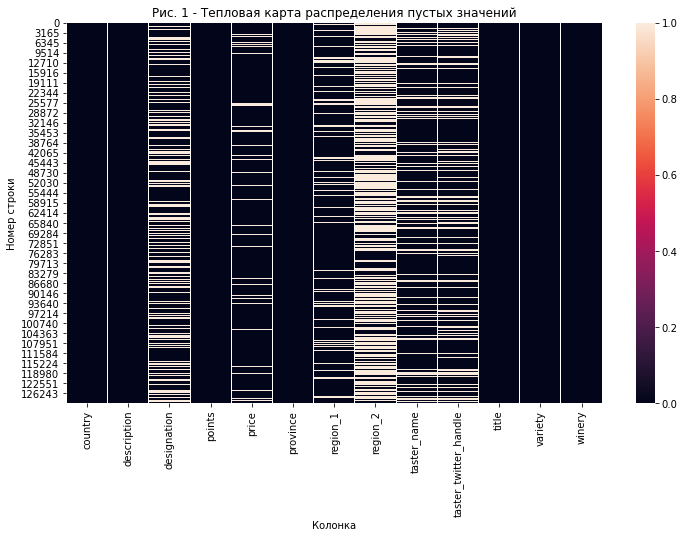

In [195]:
# Построим тепловую диаграмму распределения пустых значений
fig, axes = plt.subplots(figsize=(12, 7))
heatmap = sns.heatmap(data=data.isnull())
heatmap.set_title('Рис. 1 - Тепловая карта распределения пустых значений');
heatmap.set_ylabel('Номер строки')
heatmap.set_xlabel('Колонка')

In [196]:
# Доля пустых значений в каждой колонке
round(data.isnull().sum()/data.shape[0]*100, 2)

country                   0.05
description               0.00
designation              28.79
points                    0.00
price                     7.00
province                  0.05
region_1                 16.30
region_2                 61.02
taster_name              20.77
taster_twitter_handle    24.54
title                     0.00
variety                   0.00
winery                    0.00
dtype: float64

Столбик region_2 имеет 61% пропусков, поэтому будет правильно удалить весь столбик.

In [197]:
# Удалим столбик region_2
data = data.drop('region_2', axis=1)

In [198]:
# заполним пустые категориальные признаки значением unknown
data['country'] = data['country'].fillna('unknown')
data['designation'] = data['designation'].fillna('unknown')
data['province'] = data['province'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

In [199]:
# заполним пустые ячейки стобика price средними значениями
data['price'] = data['price'].fillna(data['price'].mean())

In [201]:
# Доля пустых значений после обработки
round(data.isnull().sum()/data.shape[0]*100, 2)

country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

В результате получился очищенный от дубликатов и пустых значений датасет